In [ ]:
import numpy as np
import pandas as pd
import os
# visualization
import matplotlib.pyplot as plt

In [ ]:
from wordcloud import WordCloud

In [ ]:
#naver movie train, test
path = '/content'
file = os.path.join(path,'ratings_test.txt' )

In [ ]:
df = pd.read_csv(file,sep = '\t',encoding='utf-8')
df.head(5)

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


In [ ]:
df.label.value_counts() #positive:1, negative:0 -> 감정분석

1    25173
0    24827
Name: label, dtype: int64

In [ ]:
#1. column명: ID, Document, Label : Capitalize
#2. label -> 기존의 'label' 바꾸기
#3. tokenize : Komoran, 'Token' 열 새로 만들어서 담기
#4. token의 개수 열 만들기 'Token_len'

In [ ]:
# 1
df.columns = ['ID','Document','Label']
#2
def name(num):
  if num == 1:
    return 'positive'
  else: 
    return 'negative'

df['Label'] = df['Label'].apply(name)
df['Label'] = df['Label'].apply(lambda x: 'positive' if x==1 else 'negative')

In [ ]:
#3
!pip install konlpy
from konlpy.tag import Komoran
komoran = Komoran()

In [ ]:
df

,ID,Document,Label
0,6270596,굳 ㅋ,positive
1,9274899,GDNTOPCLASSINTHECLUB,negative
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,negative
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,negative
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,negative
...,...,...,...
49995,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,positive
49996,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,negative
49997,9072549,그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다,negative
49998,5802125,절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네,negative


In [ ]:
df['Token'] = df['Document'].apply(lambda x: komoran.morphs(str(x)))
df

,ID,Document,Label,Token
0,6270596,굳 ㅋ,positive,"[굳, ㅋ]"
1,9274899,GDNTOPCLASSINTHECLUB,negative,[GDNTOPCLASSINTHECLUB]
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,negative,"[뭐, 야, 이, 평점, 들, 은, ..., ., 나쁘, 지, ㄴ, 않, 지만, 1..."
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,negative,"[지루, 하, 지, 는, 않, 은데, 완전, 막, 장임, ..., 돈, 주, 고, ..."
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,negative,"[3D, 만, 아니, 었, 어도, 별, 다섯, 개, 주, 었, 을, 텐, 데, .,..."
...,...,...,...,...
49995,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,positive,"[오랜만, 에, 평점, 로긴했넼ㅋ, 킹왕짱, 쌈, 뽕, 하, ㄴ, 영화, 를, 만나..."
49996,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,negative,"[의지, 박, 약, 들, 이나, 하, 는, 거, 다, 탈영, 은, 일단, 주인공, ..."
49997,9072549,그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다,negative,"[그림, 도, 좋, 고, 완성도, 도, 높, 았, 지만, ..., 보, 는, 내내,..."
49998,5802125,절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네,negative,"[절대, 보, 아서, 는, 안, 되, ㄹ, 영화, ., ., 재미, 도, 없, 고,..."


In [ ]:
df['Token_len'] = df['Token'].apply(lambda x: len(x))
df

,ID,Document,Label,Token,Token_len
0,6270596,굳 ㅋ,positive,"[굳, ㅋ]",2
1,9274899,GDNTOPCLASSINTHECLUB,negative,[GDNTOPCLASSINTHECLUB],1
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,negative,"[뭐, 야, 이, 평점, 들, 은, ..., ., 나쁘, 지, ㄴ, 않, 지만, 1...",20
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,negative,"[지루, 하, 지, 는, 않, 은데, 완전, 막, 장임, ..., 돈, 주, 고, ...",19
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,negative,"[3D, 만, 아니, 었, 어도, 별, 다섯, 개, 주, 었, 을, 텐, 데, .,...",30
...,...,...,...,...,...
49995,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,positive,"[오랜만, 에, 평점, 로긴했넼ㅋ, 킹왕짱, 쌈, 뽕, 하, ㄴ, 영화, 를, 만나...",21
49996,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,negative,"[의지, 박, 약, 들, 이나, 하, 는, 거, 다, 탈영, 은, 일단, 주인공, ...",20
49997,9072549,그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다,negative,"[그림, 도, 좋, 고, 완성도, 도, 높, 았, 지만, ..., 보, 는, 내내,...",18
49998,5802125,절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네,negative,"[절대, 보, 아서, 는, 안, 되, ㄹ, 영화, ., ., 재미, 도, 없, 고,...",26


In [ ]:
print(np.max(df.Token_len))
print(np.min(df.Token_len))
print(np.mean(df.Token_len))
print(np.std(df.Token_len))
print(np.percentile(df.Token_len,25))
print(np.median(df.Token_len))

111
1
19.20736
16.407059512004334
9.0
14.0


In [ ]:
df.Token_len.describe()

count    50000.000000
mean        19.207360
std         16.407224
min          1.000000
25%          9.000000
50%         14.000000
75%         23.000000
max        111.000000
Name: Token_len, dtype: float64

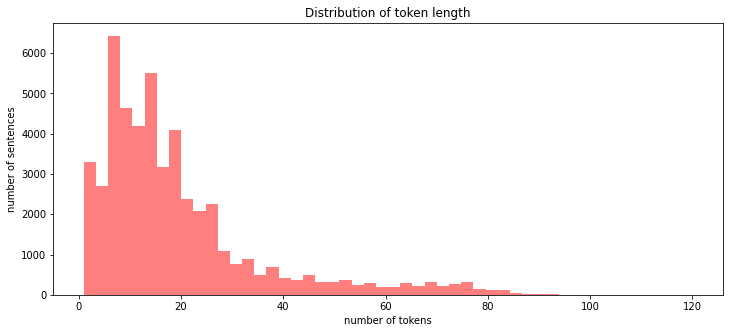

In [ ]:
#visualization
plt.figure(figsize =(12,5))
plt.hist(df.Token_len, bins = 50,alpha =0.5, color = 'r',label = 'token',range=[1, 120])
plt.title('Distribution of token length')
plt.xlabel('number of tokens')
plt.ylabel('number of sentences')
plt.show()

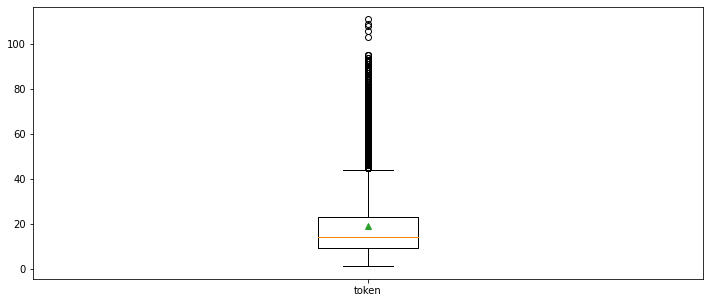

In [ ]:
#boxplot
plt.figure(figsize=(12,5))
plt.boxplot([df.Token_len], labels= ['token'], showmeans=True)
plt.show()

In [ ]:
#boxplot
plt.figure(figsize=(12,5))
plt.boxplot([], labels= ['token'], showmeans=True)
plt.show()

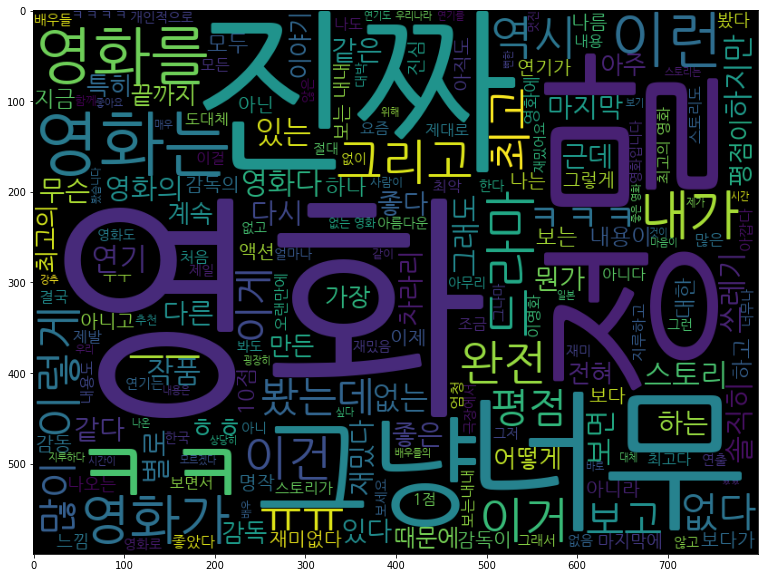

In [ ]:
#wordcloud 단어구름
font_path = '/content/NanumGothic.ttf'
cloud = WordCloud(font_path =font_path,width=800,height=600).generate(' '.join(df.Document.astype(str)))
plt.figure(figsize = (15,10))
plt.imshow(cloud)
plt.show()